## Assignment - 2
### Name : Limalka Sadith
### Index No : 190538N

### Question 1

(-0.009277650744390208, 0.22065553812087146)
10.084455070525161


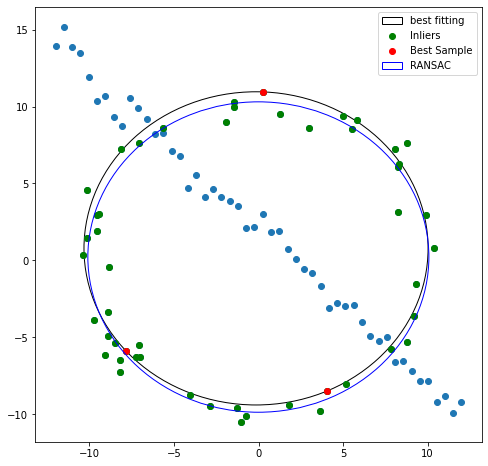

In [11]:
import random
import numpy as np
from scipy import optimize
from scipy import linalg
import matplotlib.pyplot as plt
import random
import cv2 as cv

N = 100

half_n = N//2
r = 10
s = r /16
t = np.random.uniform(0 , 2*np.pi , half_n)
n = s*np.random.randn (half_n)

x , y = (r+n)*np.cos(t) , (r+n)*np.sin(t)
X_circ = np.hstack ((x.reshape(half_n , 1) , y.reshape(half_n , 1)))

m, b = -1, 2
x = np.linspace (-12, 12 , half_n )
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack (( x.reshape (half_n , 1) , y.reshape(half_n , 1)))

X = np.vstack((X_circ , X_line))


def get_samples(list):
    samples = []
    rand_nums = random.sample(range(1, len(list)), 3)
    for i in rand_nums:
        samples.append((list[i][0], list[i][1]))
    return samples

def get_circle(sample):
    p1, p2, p3 = sample
    temp = p2[0] * p2[0] + p2[1] * p2[1]
    bc = (p1[0] * p1[0] + p1[1] * p1[1] - temp) / 2
    cd = (temp - p3[0] * p3[0] - p3[1] * p3[1]) / 2
    det = (p1[0] - p2[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p2[1])

    Cx = (bc*(p2[1] - p3[1]) - cd*(p1[1] - p2[1])) / det # center x
    Cy = ((p1[0] - p2[0]) * cd - (p2[0] - p3[0]) * bc) / det # center y
    r = np.sqrt((Cx - p1[0])**2 + (Cy - p1[1])**2) # radius
    
    return Cx, Cy, r

def inliers(data, Cx, Cy, r):
    inliers = []
    d = r + r//5

    for i in range(len(data)):
        dis = np.sqrt((data[i][0]-Cx)**2 + (data[i][1]-Cy)**2)
        if dis < d:
            inliers.append(data[i])

    return inliers


max_inliers = []
radius = 0
center_x = 0
center_y = 0

for i in range(0,1000):
    sample_list = get_samples(X_circ)
    Cx, Cy, r = get_circle(sample_list)
   
    inlier_list = inliers(X_circ, Cx, Cy, r)
    if len(inlier_list)>len(max_inliers):
        max_inliers = inlier_list
        radius = r
        center_x = Cx
        center_y = Cy
        samples = sample_list


plt.figure(figsize=(8,8))
circle = plt.Circle(( center_x , center_y ), radius, fill=False, label = "best fitting", color = 'k' )
fig = plt.gcf()
ax = fig.gca() 
ax.add_patch(circle)  
plt.scatter(X[:,0],X[:,1])
inliers = np.array(max_inliers)
plt.scatter(inliers[:,0],inliers[:,1] , c = "g", label="Inliers")
plt.scatter([samples[0][0], samples[1][0], samples[2][0]] , [samples[0][1], samples[1][1], samples[2][1]] , c ="r", label="Best Sample")

#calculate the distance of each points from the center (xc, yc)
def R_dist(x_, y_, xc, yc):
    return np.sqrt((x_-xc)**2 + (y_-yc)**2)

#calculate the algebraic distance between the data points and the mean circle centered at c=(xc, yc) 
def f_2(c, x_, y_):
    Ri = R_dist(x_, y_, *c)
    return Ri - Ri.mean()

def circleFitting(x_c, y_c, points):
    x_data = points[:,0]
    y_data = points[:,1]
    estimated_c = x_c, y_c
    new_center, ier = optimize.leastsq(f_2, estimated_c, (x_data, y_data))

    xc_2, yc_2 = new_center

    Ri_2 = R_dist(x_data, y_data, *new_center)
    R_2 = Ri_2.mean()
    return (xc_2, yc_2), R_2

r_center, r_radius = circleFitting(center_x, center_y, np.array(max_inliers))

circle = plt.Circle(r_center, r_radius, fill = False, label = "RANSAC", color = 'b')
ax.add_patch(circle)
ax.legend()
print(r_center,r_radius,sep ='\n')
plt.show()

### Question 2

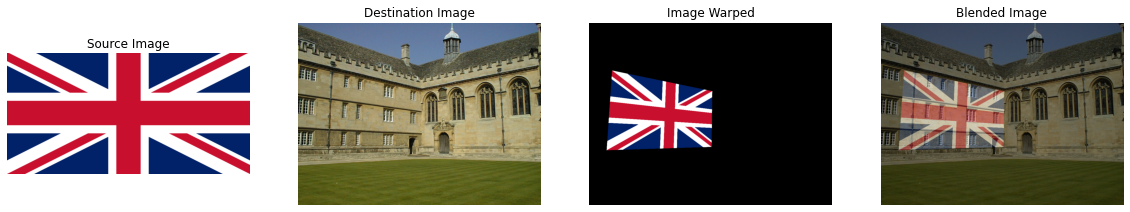

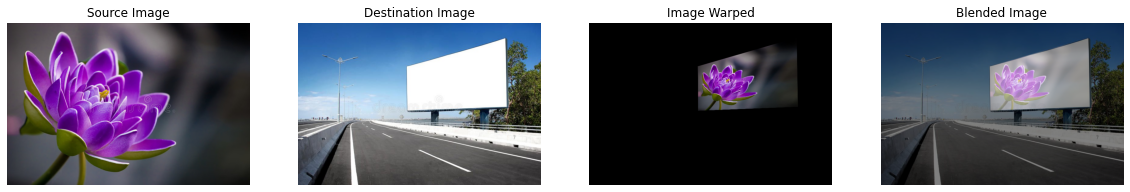

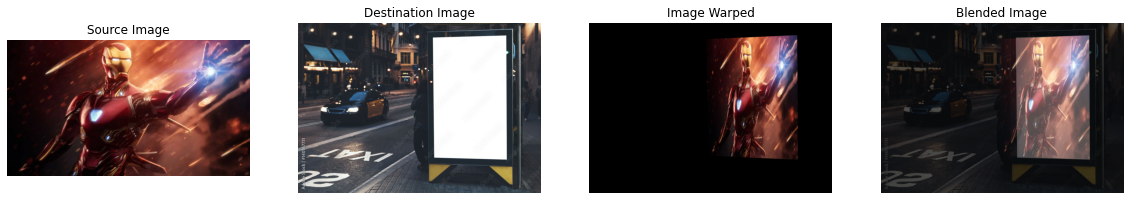

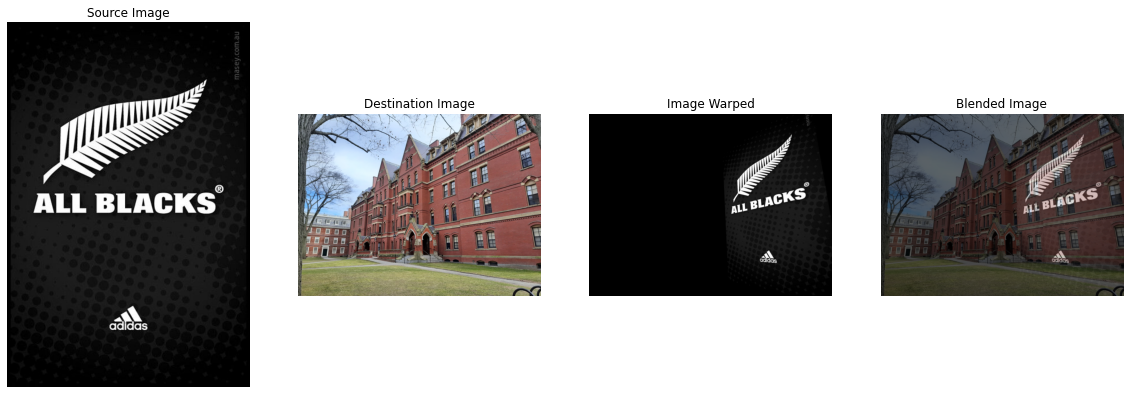

In [34]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

dst1 = cv.imread("001.jpg")
dst2 = cv.imread("banner_2.jpg")
dst3 = cv.imread("banner_1.jpg")
dst4 = cv.imread("harvard.jpeg")


# Destination corners
pts_dst1 = np.array([[97, 200], [74, 536], [519, 287],[516, 522]])
pts_dst2 = np.array([[358, 142], [683, 48], [359, 288], [687, 275]])
pts_dst3 = np.array([[654, 59], [856, 50], [660, 553],[860, 562]])
pts_dst4 = np.array([[548, 215], [562, 451], [979, 376], [907, 2]])


src1 = cv.imread("Flag.png")
src2 = cv.imread("flower.jpg")
src3 = cv.imread("iron.jpg")
src4 = cv.imread("all_blacks.jpg")


# Source corners
pts_src1 = np.array([[0, 0], [0, 958], [1919, 0],[1919, 958]])
pts_src2 = np.array([[0, 0], [799, 0], [0, 532],[799, 532]])
pts_src3 = np.array([[400, 0], [839, 0], [400, 472], [839, 472]])
pts_src4 = np.array([[0, 75], [6, 375], [415, 369], [410, 65]])



def displayImage(src, dst, pts_src, pts_dst,alpha):
    h, _ = cv.findHomography(pts_src, pts_dst)
    img_warp = cv.warpPerspective(src, h, (dst.shape[1],dst.shape[0]))
    img_blended = cv.addWeighted(dst, alpha, img_warp, 1-alpha, 0.0)

    fig,ax = plt.subplots(1,4,figsize=(20,15))
    ax[0].imshow(cv.cvtColor(src, cv.COLOR_BGR2RGB))
    ax[0].set_title("Source Image")
    ax[0].axis("off")
    ax[1].imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))
    ax[1].set_title("Destination Image")
    ax[1].axis("off")
    ax[2].imshow(cv.cvtColor(img_warp, cv.COLOR_BGR2RGB))
    ax[2].set_title("Image Warped")
    ax[2].axis("off")
    ax[3].imshow(cv.cvtColor(img_blended, cv.COLOR_BGR2RGB))
    ax[3].set_title("Blended Image")
    ax[3].axis("off")

 

displayImage(src1, dst1, pts_src1, pts_dst1,0.6)
displayImage(src2, dst2, pts_src2, pts_dst2,0.5)
displayImage(src3, dst3, pts_src3, pts_dst3,0.3)
displayImage(src4, dst4, pts_src4, pts_dst4,0.4)

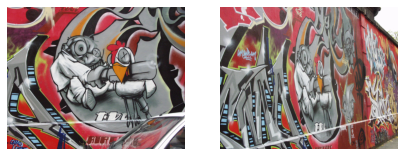

In [5]:
img1 = cv.imread("img1.ppm")
img2 = cv.imread("img5.ppm")

assert img1 is not None
assert img2 is not None

grey1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
grey2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

fig, ax = plt.subplots(1, 2, figsize = (7, 12))
ax[0].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
ax[0].axis('off')
ax[1].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
ax[1].axis('off')

plt.show()

In [ ]:
sift = cv.SIFT_create() # find sift features
keypoint1, descriptors1 = sift.detectAndCompute(img1,None)
keypoint5, descriptors5 = sift.detectAndCompute(img5,None)
bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True) # match features
matches15 = bf.match(descriptors1,descriptors5)
matches15 = sorted(matches15, key = lambda x:x.distance) # sorting to get the best matches
img_matched = cv.drawMatches(img1_bgr, keypoint1, img5_bgr, keypoint5, matches15[:50], img5, flags = 2) # deaw the matches

(-0.5, 1599.5, 639.5, -0.5)

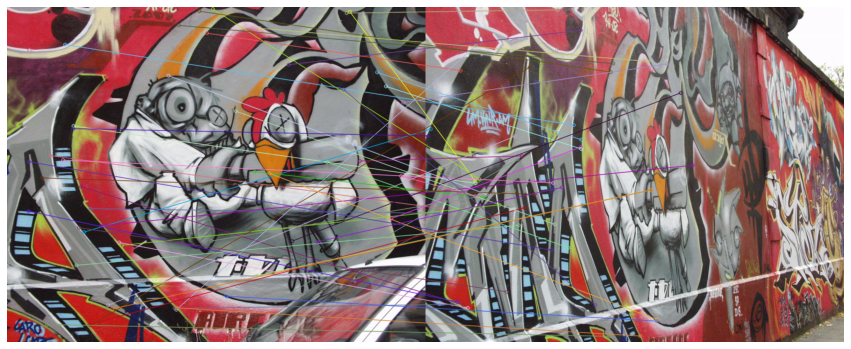

In [1]:
import cv2 as cv
import numpy as np
from scipy import optimize
from scipy import linalg
import random
import matplotlib.pyplot as plt

#Match sift features of the images
img1_bgr = cv.imread('img1.ppm')  
img4_bgr = cv.imread('img4.ppm')  
img5_bgr = cv.imread('img5.ppm')
#Convert to gray scale
img1 = cv.cvtColor(img1_bgr,cv.COLOR_BGR2GRAY)
img5 = cv.cvtColor(img5_bgr,cv.COLOR_BGR2GRAY)
img4 = cv.cvtColor(img4_bgr,cv.COLOR_BGR2GRAY)
#find sift features
sift = cv.SIFT_create()
keypoint1, descriptors1 = sift.detectAndCompute(img1,None)
keypoint5, descriptors5 = sift.detectAndCompute(img5,None)
keypoint4, descriptors4 = sift.detectAndCompute(img4,None)
#match features
bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)
matches15 = bf.match(descriptors1,descriptors5)
matches14 = bf.match(descriptors1,descriptors4)
matches45 = bf.match(descriptors4,descriptors5)
#sorting to get the best matches
matches15 = sorted(matches15, key = lambda x:x.distance)
matches14 = sorted(matches14, key = lambda x:x.distance)
matches45 = sorted(matches45, key = lambda x:x.distance)

fig, ax = plt.subplots(figsize = (15,15))
img_matched = cv.drawMatches(img1_bgr, keypoint1, img5_bgr, keypoint5, matches15[:50], img5, flags = 2)
plt.imshow(cv.cvtColor(img_matched,cv.COLOR_BGR2RGB))

ax.axis('off')

In [2]:
def calculateHomography(identical_points):
      assemble = []
      for points in identical_points:
        p1 = np.matrix([points.item(0), points.item(1), 1])
        p2 = np.matrix([points.item(2), points.item(3), 1])
 
        assemble_1 = [-p2.item(2) * p1.item(0), -p2.item(2) * p1.item(1), -p2.item(2) * p1.item(2), 0, 0, 0,
              p2.item(0) * p1.item(0), p2.item(0) * p1.item(1), p2.item(0) * p1.item(2)]
        assemble.append(assemble_1)
        
        assemble_2 = [0, 0, 0, -p2.item(2) * p1.item(0), -p2.item(2) * p1.item(1), -p2.item(2) * p1.item(2),
              p2.item(1) * p1.item(0), p2.item(1) * p1.item(1), p2.item(1) * p1.item(2)]
        assemble.append(assemble_2)

      mat_assemble = np.matrix(assemble)
      #svd composition
      u, s, v = np.linalg.svd(mat_assemble)
      #reshape the min singular value into a 3 by 3 matrix
      homography = np.reshape(v[8], (3, 3))
      #normalize 
      homography = (1/homography.item(8)) * homography
      return homography

#Calculate the geometric distance between estimated points and original points
def difference(points, h):
    point_1 = np.transpose(np.matrix([points[0].item(0), points[0].item(1), 1]))
    point_2 = np.transpose(np.matrix([points[0].item(2), points[0].item(3), 1]))
    #get the value of point2 by taking dot product with the calculated homography matrix
    estimated_point2 = np.dot(h, point_1)
    estimated_point2 = (1/estimated_point2.item(2))*estimated_point2
    #Calculate the error between the actual value and estimated value of the  point
    error = point_2 - estimated_point2
    return np.linalg.norm(error)

def ransac_homography(points):
    max_Inliers = []
    ransac_h = None
    for i in range(1000):

        sample_points = []
        rand_nums = random.sample(range(1, len(points)), 4)
        for i in rand_nums:
            sample_points.append(points[i])

        #call the homography function 
        h = calculateHomography(sample_points)
        inliers = []

        #find the inliers
        for i in range(len(points)):
            d = difference(points[i], h)
            if d < 5:
                inliers.append(points[i])
        
        if len(inliers) > len(max_Inliers):
            max_Inliers = inliers
            ransac_h = h
    
    return ransac_h, max_Inliers

In [3]:
identical_points14 = []
keypoints14 = [keypoint1,keypoint4]

for i in matches14:
    (x1, y1) = keypoints14[0][i.queryIdx].pt
    (x2, y2) = keypoints14[1][i.trainIdx].pt
    identical_points14.append([x1, y1, x2, y2])

identical_mat14 = np.matrix(identical_points14)
#run ransac algorithm
finalH14, inliers14 = ransac_homography(identical_mat14)

identical_points45 = []
keypoints45 = [keypoint4,keypoint5]

for i in matches45:
    (x1, y1) = keypoints45[0][i.queryIdx].pt
    (x2, y2) = keypoints45[1][i.trainIdx].pt
    identical_points45.append([x1, y1, x2, y2])

identical_mat45 = np.matrix(identical_points45)
#run ransac algorithm
finalH45, inliers45 = ransac_homography(identical_mat45)

In [4]:
print("Homograpghy of img1 to img5: ")
print(np.dot(finalH45,finalH14))

Homograpghy of img1 to img5: 
[[ 6.07656284e-01  2.76045169e-02  2.19658644e+02]
 [ 2.27909470e-01  1.11446425e+00 -2.79751906e+01]
 [ 4.85988829e-04 -1.30445394e-04  9.82831404e-01]]


Text(0.5, 1.0, 'stiched image')

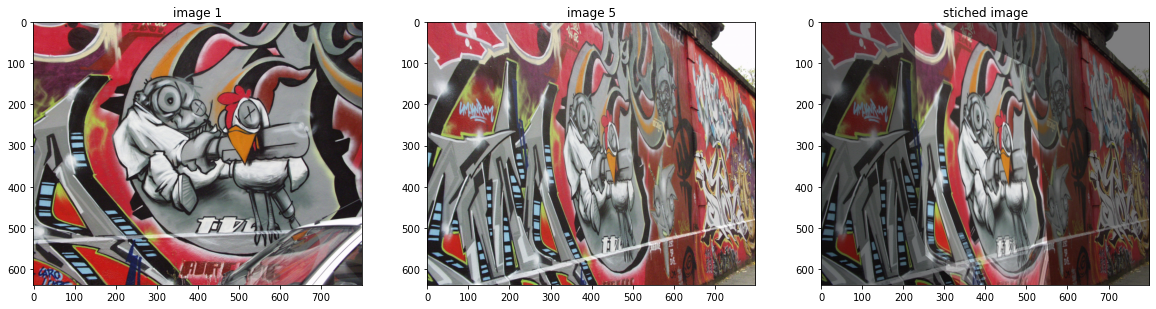

In [5]:
width = img5.shape[1]  
height =img5.shape[0]
result14 = cv.warpPerspective(img1_bgr, finalH14, (width, height))
result45 = cv.warpPerspective(result14, finalH45, (width, height))

#blending 2 images together
stitched = cv.addWeighted(img5_bgr, 0.5, result45, 0.5, 0.0)
fig,axes = plt.subplots(1,3,figsize=(20,10))
axes[0].imshow(cv.cvtColor(img1_bgr,cv.COLOR_BGR2RGB))
axes[0].set_title("image 1")
axes[1].imshow(cv.cvtColor(img5_bgr,cv.COLOR_BGR2RGB))
axes[1].set_title("image 5")
axes[2].imshow(cv.cvtColor(stitched,cv.COLOR_BGR2RGB))
axes[2].set_title("stiched image")